In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from utilities import *
import time
from torch.utils.tensorboard import SummaryWriter
import mlflow
from mlflow.tracking import MlflowClient

data = FashionMNISTLoader(resize=(128,128),batch_size=32)

# 定义 ViT 模型
model = ViT(image_size=128, patch_size=16, num_classes=10, dim=256, depth=2, heads=8, mlp_dim=1024, channels=1, dropout=0.1)

# 定义优化器函数和超参数
optimizer_name = 'Adadelta'
trainer_fn = torch.optim.Adadelta
hyperparams = {'lr': 0.1}

# 创建 Trainer 实例并训练模型
trainer = Trainer(trainer_fn, optimizer_name, hyperparams, data, model, feature_dim=10, num_epochs=10, cuda=True)
trainer.fit()
trainer.writer.close()

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from utilities import *
import time
from torch.utils.tensorboard import SummaryWriter

# 加载数据
data = FashionMNISTLoader(resize=(128, 128), batch_size=32)

# 定义优化器函数和超参数
optimizers = {
    'SGD': torch.optim.SGD,
    'Adadelta': torch.optim.Adadelta,
    'Momentum':torch.optim.SGD,
    'AdaGrad': torch.optim.Adagrad,
    'RMSProp': torch.optim.RMSprop,
    'Adam': torch.optim.Adam
}

hyperparams = {
    'SGD': {'lr': 0.1},
    'Adadelta': {'lr': 0.1},
    'Momentum': {'lr': 0.1},
    'AdaGrad': {'lr': 0.1},
    'RMSProp': {'lr': 0.1},
    'Adam': {'lr': 0.1}
}

# 依次运行不同的优化器
for optimizer_name, optimizer_fn in optimizers.items():
    # 重新定义并初始化模型
    model = ViT(image_size=128, patch_size=16, num_classes=10, dim=256, depth=2, heads=8, mlp_dim=1024, channels=1, dropout=0.1)

    # 创建 TensorBoard 记录器
    writer = SummaryWriter()

    # 创建 Trainer 实例并训练模型
    trainer = Trainer(optimizer_fn, optimizer_name, hyperparams[optimizer_name], data, model, feature_dim=10, num_epochs=10, cuda=True)
    trainer.writer = writer  # 设置 TensorBoard 记录器
    trainer.fit()
    trainer.writer.close()

KeyboardInterrupt: 

In [3]:
# 定义标准的 SGD 算法
def GD(params, lr=0.001):
    grad = f_2d_grad(*params)
    params -= lr * grad
    return params

def SGD(params, lr=0.001):
    grad = f_2d_grad(*params) + randn(2)*0.2  # 添加噪声
    params -= lr * grad
    return params

# 定义带有动量的 SGD 算法
def SGD_momentum(params, states, lr=0.001, momentum=0.8):
    if 'velocity' not in states:
        states['velocity'] = np.zeros_like(params)
    
    grad = f_2d_grad(*params) + randn(2)*0.2  # 添加噪声
    states['velocity'] = momentum * states['velocity'] + grad
    params -= lr * states['velocity']
    
    return params

# 定义 Adagrad 算法
def Adagrad(params, states, lr=0.001):
    if 'square_sum' not in states:
        states['square_sum'] = np.zeros_like(params)
    
    grad = f_2d_grad(*params) + randn(2)*0.2   # 添加噪声
    states['square_sum'] = 0.3*grad**2 + 0.7*states['square_sum']
    params -= lr * grad / np.sqrt(states['square_sum'] + 1e-2)
    
    return params



C:\Users\zlg\AppData\Local\Temp\ipykernel_29136\4072445574.py:12: RuntimeWarning: overflow encountered in double_scalars
  dx1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
C:\Users\zlg\AppData\Local\Temp\ipykernel_29136\1706188563.py:4: RuntimeWarning: invalid value encountered in subtract
  params -= lr * grad


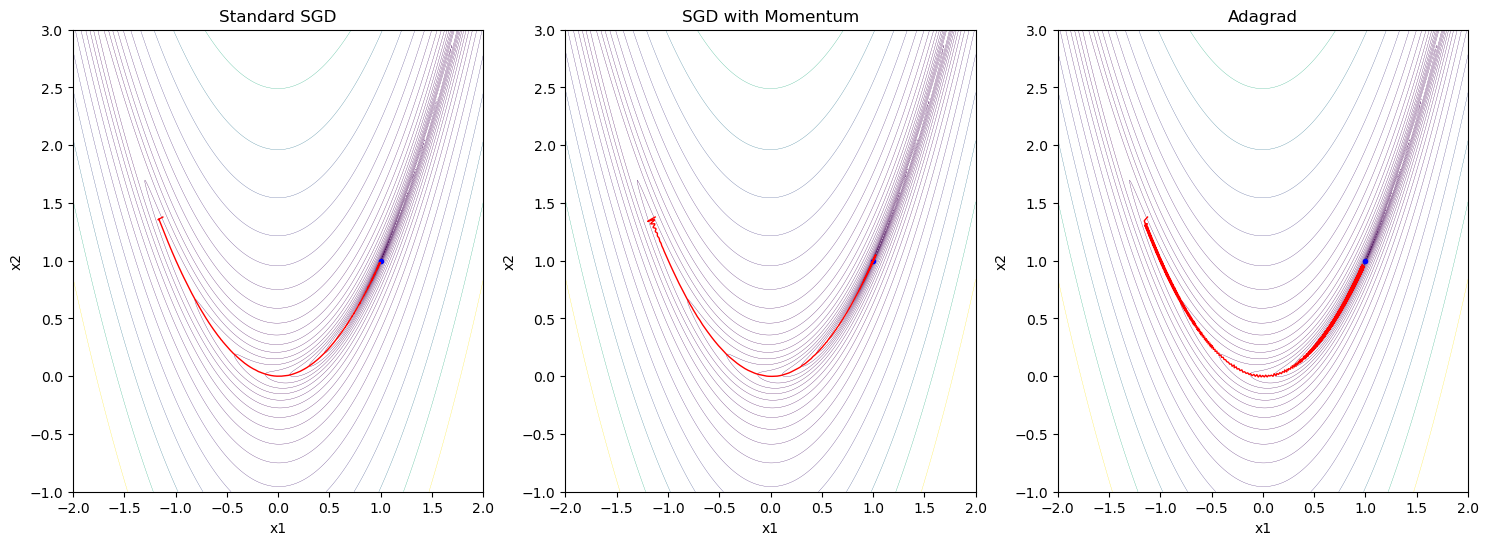

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy.random import randn

# 定义 Rosenbrock 函数
def f_2d(x1, x2):
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

# 定义 Rosenbrock 函数的梯度
def f_2d_grad(x1, x2):
    dx1 = -2 * (1 - x1) - 400 * x1 * (x2 - x1**2)
    dx2 = 200 * (x2 - x1**2)
    return np.array([dx1, dx2])

# 创建网格数据
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

# 初始化参数
start = np.array([-1.0, 1.5]) + randn(2) * 0.1
params_sgd = start.copy()
params_momentum = start.copy()
params_adagrad = start.copy()
params_gd = start.copy()
num_steps = 10000



# 存储参数轨迹
trajectory_sgd = [params_sgd.copy()]
trajectory_momentum = [params_momentum.copy()]
trajectory_adagrad = [params_adagrad.copy()]
trajectory_gd = [params_gd.copy()]
states_momentum = {}
states_adagrad = {}

# 运行标准的 SGD 算法
for _ in range(num_steps):
    params_sgd = SGD(params_sgd, 0.001)
    if np.linalg.norm(f_2d_grad(*params_adagrad)) < 1e-2:
        break
    trajectory_sgd.append(params_sgd.copy())

# 运行带有动量的 SGD 算法
for _ in range(num_steps):
    params_momentum = SGD_momentum(params_momentum, states_momentum, 0.001)
    if np.linalg.norm(f_2d_grad(*params_adagrad)) < 1e-2:
        break
    trajectory_momentum.append(params_momentum.copy())

# 运行 Adagrad 算法
for _ in range(num_steps):
    params_adagrad = Adagrad(params_adagrad, states_adagrad, 0.015)
    if np.linalg.norm(f_2d_grad(*params_adagrad)) < 1e-2:
        break
    trajectory_adagrad.append(params_adagrad.copy())

# 运行标准的 GD 算法
for _ in range(num_steps):
    params_gd = GD(params_gd, 0.06)
    if np.linalg.norm(f_2d_grad(*params_gd)) < 1e-3:
        break
    trajectory_gd.append(params_gd.copy())

trajectory_sgd = np.array(trajectory_sgd)
trajectory_momentum = np.array(trajectory_momentum)
trajectory_adagrad = np.array(trajectory_adagrad)
trajectory_gd = np.array(trajectory_gd)
# 创建图形和子图
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 绘制标准的 SGD 算法的等高线图
contour1 = ax1.contour(X, Y, Z, levels=np.logspace(-3, 3, 30), cmap='viridis', linewidths=0.2)
ax1.plot(1, 1, 'bo', markersize=3)  # 标记最优点
ax1.set_title('Standard SGD')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

contour2 = ax2.contour(X, Y, Z, levels=np.logspace(-3, 3, 30), cmap='viridis', linewidths=0.2)
ax2.plot(1, 1, 'bo', markersize=3)  # 标记最优点
ax2.set_title('SGD with Momentum')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')


# 绘制 Adagrad 算法的等高线图
contour3 = ax3.contour(X, Y, Z, levels=np.logspace(-3, 3, 30), cmap='viridis', linewidths=0.2)
ax3.plot(1, 1, 'bo', markersize=3)  # 标记最优点
ax3.set_title('Adagrad')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')


# 绘制 GD、SGD 和 Adagrad 的轨迹

# 初始化函数
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

# 更新函数
def update(frame):
    frame = frame*20
    line1.set_data(trajectory_sgd[:frame, 0], trajectory_sgd[:frame, 1])
    line2.set_data(trajectory_momentum[:frame, 0], trajectory_momentum[:frame, 1])
    line3.set_data(trajectory_adagrad[:frame, 0], trajectory_adagrad[:frame, 1])
    return line1, line2, line3

# 创建动画
line1, = ax1.plot([], [], 'r-', lw=1)
line2, = ax2.plot([], [], 'r-', lw=1)
line3, = ax3.plot([], [], 'r-', lw=1)
ani = animation.FuncAnimation(fig, update, frames=len(trajectory_sgd)//20, init_func=init, blit=True)

ani.save('sgd_momentum_ada.mp4', writer='ffmpeg')
# 显示动画
plt.show()

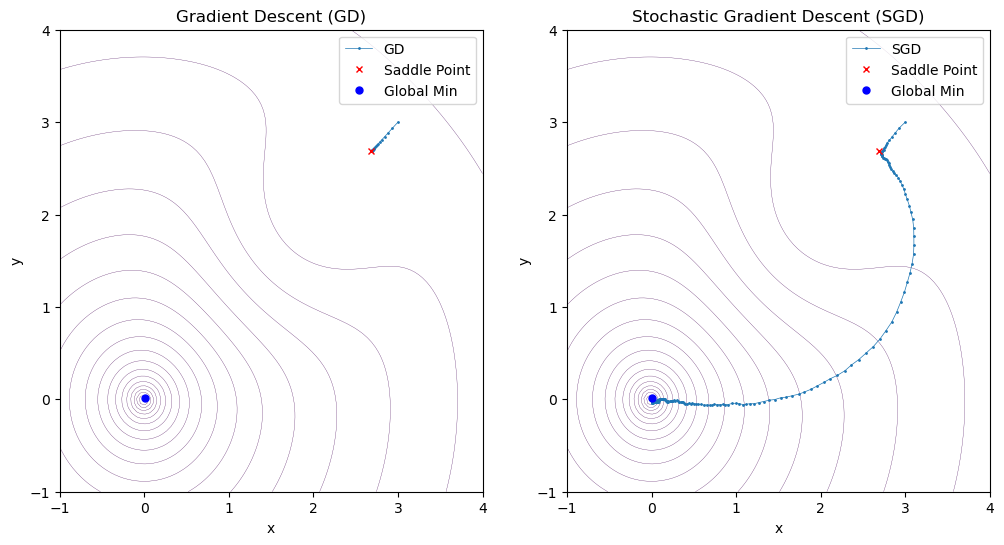

[2.68385877 2.68385877] [-0.00754334 -0.01026538]


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy.random import randn

# 定义具有局部极小值和全局极小值的函数及其梯度
def f_2d(x, y):
    return (x**2 + y**2) + 10 * np.exp(-((x-2)**2 + (y-2)**2))

def f_2d_grad(x, y):
    grad_x = 2*x - 20*(x-2)*np.exp(-((x-2)**2 + (y-2)**2))
    grad_y = 2*y - 20*(y-2)*np.exp(-((x-2)**2 + (y-2)**2))
    return np.array([grad_x, grad_y])

# 定义标准的 GD 算法
def GD(params, lr=0.1):
    grad = f_2d_grad(*params)
    params -= lr * grad
    return params

# 定义标准的 SGD 算法
def SGD(params, lr=0.1):
    grad = f_2d_grad(*params) + randn(2)*0.3  # 添加噪声
    params -= lr * grad
    return params

# 初始化参数
params_gd = np.array([3.0, 3.0])
params_sgd = np.array([3.0, 3.0])

# 学习率
lr = 0.02

# 迭代次数
num_iterations = 300

# 存储参数轨迹
trajectory_gd = [params_gd.copy()]
trajectory_sgd = [params_sgd.copy()]

# 运行 GD 和 SGD
for i in range(num_iterations):
    params_gd = GD(params_gd, lr)
    trajectory_gd.append(params_gd.copy())

for i in range(num_iterations):
    params_sgd = SGD(params_sgd, lr)
    trajectory_sgd.append(params_sgd.copy())
    if np.linalg.norm(f_2d_grad(*params_sgd)) < 1e-2:
        break
# 转换为 numpy 数组
trajectory_gd = np.array(trajectory_gd)
trajectory_sgd = np.array(trajectory_sgd)

# 绘制函数等高线和参数轨迹
x = np.linspace(-1, 4, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 GD 轨迹
ax[0].contour(X, Y, Z, levels=np.logspace(-3, 3, 30),linewidths=0.2)
gd_line, = ax[0].plot([], [], 'o-', markersize=1,label='GD',lw=0.5)
ax[0].plot(2.68385877,2.68385877, 'x', markersize=5, color='red', label='Saddle Point')
ax[0].plot(0.01, 0.01, 'o', markersize=5, color='blue', label='Global Min')
ax[0].set_title('Gradient Descent (GD)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# 绘制 SGD 轨迹
ax[1].contour(X, Y, Z, levels=np.logspace(-3, 3, 30),linewidths=0.2)
sgd_line, = ax[1].plot([], [], 'o-', markersize=1,label='SGD',lw=0.5)
ax[1].plot(2.68385877,2.68385877, 'x', markersize=5, color='red', label='Saddle Point')
ax[1].plot(0.01, 0.01, 'o', markersize=5, color='blue', label='Global Min')
ax[1].set_title('Stochastic Gradient Descent (SGD)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

def init():
    gd_line.set_data([], [])
    sgd_line.set_data([], [])
    return gd_line, sgd_line

def update(frame):
    frame = frame
    gd_line.set_data(trajectory_gd[:frame, 0], trajectory_gd[:frame, 1])
    sgd_line.set_data(trajectory_sgd[:frame, 0], trajectory_sgd[:frame, 1])
    return gd_line, sgd_line

ani = FuncAnimation(fig, update, frames=num_iterations, init_func=init, blit=True, interval=100)
ani.save('gd_sgd.mp4', writer='ffmpeg')
plt.show()
print(trajectory_gd[-1],trajectory_sgd[-1])

$$\mathbf{w} \leftarrow \mathbf{w} - \eta_t \mathbf{g}_t$$
# SGD（minibatch）
$$\mathbf{g}_t = \partial_{\mathbf{w}} \frac{1}{|\mathcal{B}_t|} \sum_{i \in \mathcal{B}_t} f(\mathbf{x}_{i}, \mathbf{w})$$

# Momentum
$$
\begin{aligned}
\mathbf{v}_t &\leftarrow \beta \mathbf{v}_{t-1} + \mathbf{g}_{t, t-1}, \\
\mathbf{w}_t &\leftarrow \mathbf{w}_{t-1} - \eta_t \mathbf{v}_t.
\end{aligned}
$$

# AdaGrad
$$\begin{aligned}
    \mathbf{s}_t & = \mathbf{s}_{t-1} + \mathbf{g}_t^2, \\
    \mathbf{w}_t & = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t.
\end{aligned}$$

类似牛顿迭代法的思想，对梯度下降进行sacling，但是由于hesse矩阵的计算量太大，所以用了一个近似的方法，选取hesse矩阵的对角元代替，而后又利用梯度的方差来近似对角元。

# RMSProp
$$\begin{aligned}
    \mathbf{s}_t & \leftarrow \gamma \mathbf{s}_{t-1} + (1 - \gamma) \mathbf{g}_t^2, \\
    \mathbf{w}_t & \leftarrow \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t.
\end{aligned}$$

# Adam
$$\begin{aligned}
    \mathbf{v}_t & \leftarrow \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1) \mathbf{g}_t, \\
    \mathbf{s}_t & \leftarrow \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2) \mathbf{g}_t^2.
\end{aligned}$$
$$\hat{\mathbf{v}}_t = \frac{\mathbf{v}_t}{1 - \beta_1^t} \textrm{ and } \hat{\mathbf{s}}_t = \frac{\mathbf{s}_t}{1 - \beta_2^t}.$$
$$\mathbf{g}_t' = \frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}.$$
$$\mathbf{x}_t \leftarrow \mathbf{x}_{t-1} - \mathbf{g}_t'.$$

# AdaDelta
$$\begin{aligned}
    \mathbf{s}_t & = \rho \mathbf{s}_{t-1} + (1 - \rho) \mathbf{g}_t^2.
\end{aligned}$$


$$\begin{aligned}
    \mathbf{x}_t  & = \mathbf{x}_{t-1} - \mathbf{g}_t'. \\
\end{aligned}$$


$$\begin{aligned}
    \mathbf{g}_t' & = \frac{\sqrt{\Delta\mathbf{x}_{t-1} + \epsilon}}{\sqrt{{\mathbf{s}_t + \epsilon}}} \odot \mathbf{g}_t, \\
\end{aligned}$$

where $\Delta \mathbf{x}_{t-1}$ is the leaky average of the squared rescaled gradients $\mathbf{g}_t'$. We initialize $\Delta \mathbf{x}_{0}$ to be $0$ and update it at each step with $\mathbf{g}_t'$, i.e.,

$$\begin{aligned}
    \Delta \mathbf{x}_t & = \rho \Delta\mathbf{x}_{t-1} + (1 - \rho) {\mathbf{g}_t'}^2,
\end{aligned}$$

and $\epsilon$ (a small value such as $10^{-5}$) is added to maintain numerical stability.
问题：在稀疏情况下，往期的累积方差很容易遗忘（因为本质上是在对往期梯度做指数乘法）